In [1]:
from pyIClab._testing_toolkit import PackedIC
from pyIClab import (
    Eluent, IonChromatograph, GenericDiscontinousSegmentedModel,
    DSM_SimpleEquilibriums, DSM_CompleteEquilibriums)
from pyIClab import __version__ as pyIClab__version__

pyIClab__version__

'2024.6.6.1'

In [2]:
IonChromatograph._constructor_registry

{'dsm_seconstrutor': pyIClab.interface.DSM_SEConstrutor,
 'dsm_se': pyIClab.interface.DSM_SEConstrutor,
 'dsm_simpleequilibriums': pyIClab.interface.DSM_SEConstrutor,
 'dsm_seq': pyIClab.interface.DSM_SEConstrutor,
 'dsm_ceconstrutor': pyIClab.interface.DSM_CEConstrutor,
 'dsm_ce': pyIClab.interface.DSM_CEConstrutor,
 'dsm_completeequilibriums': pyIClab.interface.DSM_CEConstrutor,
 'dsm_ceq': pyIClab.interface.DSM_CEConstrutor,
 'genericdiscontinoussegmentedmodel': pyIClab.interface.DSMConstrutorForTubing}

In [3]:
ic1 = PackedIC(model_constructor_prompt='genericdiscontinoussegmentedmodel')
ic2 = PackedIC(model_constructor_prompt='dsm_simpleequilibriums')
ic3 = PackedIC(model_constructor_prompt='dsm_completeequilibriums')


In [4]:
dilute_solution = {'Cl-': '0.1 mM', 'Br-': '0.1 mM'}
for ic in [ic1, ic2, ic3]:
    (loop,) = tuple(ic.PEEKtubings)
    ic.inject(dilute_solution, loop)
    ic.start('7.0 min')
    (valve,) = tuple(ic.valves)
    # Switch the valve back to "LOAD" so we can inject the next sample
    valve.switch()

15:42:22 Activating <IC System "IC-Demo">...
    15:42:22 Configurating model paratemers...
    15:42:22 Building models...
    15:42:22 Injecting Samples...
        0.0 min: Execute Command -- <Valve "SixPort"> INJECT


Processing Br[-1] on <Loop "SampleLoop" 25 μL>:   0%|          | 0/70000 [00:00<?, ?it/s]

Processing Cl[-1] on <Loop "SampleLoop" 25 μL>:   0%|          | 0/70000 [00:00<?, ?it/s]

Processing Br[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/70018 [00:00<?, ?it/s]

Processing Cl[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/70018 [00:00<?, ?it/s]

15:42:46 IC simulation finished...

15:42:46 Activating <IC System "IC-Demo">...
    15:42:46 Configurating model paratemers...
    15:42:46 Building models...
    15:42:47 Injecting Samples...
        0.0 min: Execute Command -- <Valve "SixPort"> INJECT


Processing Br[-1] on <Loop "SampleLoop" 25 μL>:   0%|          | 0/70000 [00:00<?, ?it/s]

Processing Cl[-1] on <Loop "SampleLoop" 25 μL>:   0%|          | 0/70000 [00:00<?, ?it/s]

Processing Br[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/32243 [00:00<?, ?it/s]

Processing Cl[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/23246 [00:00<?, ?it/s]

15:43:00 IC simulation finished...

15:43:00 Activating <IC System "IC-Demo">...
    15:43:00 Configurating model paratemers...
    15:43:01 Building models...
    15:43:02 Injecting Samples...
        0.0 min: Execute Command -- <Valve "SixPort"> INJECT


Processing Br[-1] on <Loop "SampleLoop" 25 μL>:   0%|          | 0/70000 [00:00<?, ?it/s]

Processing Cl[-1] on <Loop "SampleLoop" 25 μL>:   0%|          | 0/70000 [00:00<?, ?it/s]

Processing Br[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/32243 [00:00<?, ?it/s]

Processing Cl[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/23246 [00:00<?, ?it/s]

15:43:17 IC simulation finished...



In [5]:
x, y = [], []
for i, ic in enumerate([ic1, ic2, ic3]):
    (detector,) = tuple(ic.detectors)
    df = detector.get_signals(signal_type='conductivity')
    x.append(df['time'])
    y.append(df['signal'])

Calculating eluent conductivity on <Detector "detector">...:   0%|          | 0/4200 [00:00<?, ?it/s]

Calculating eluent conductivity on <Detector "detector">...:   0%|          | 0/4200 [00:00<?, ?it/s]

Calculating eluent conductivity on <Detector "detector">...:   0%|          | 0/4200 [00:00<?, ?it/s]

[(0.0, 7.0)]

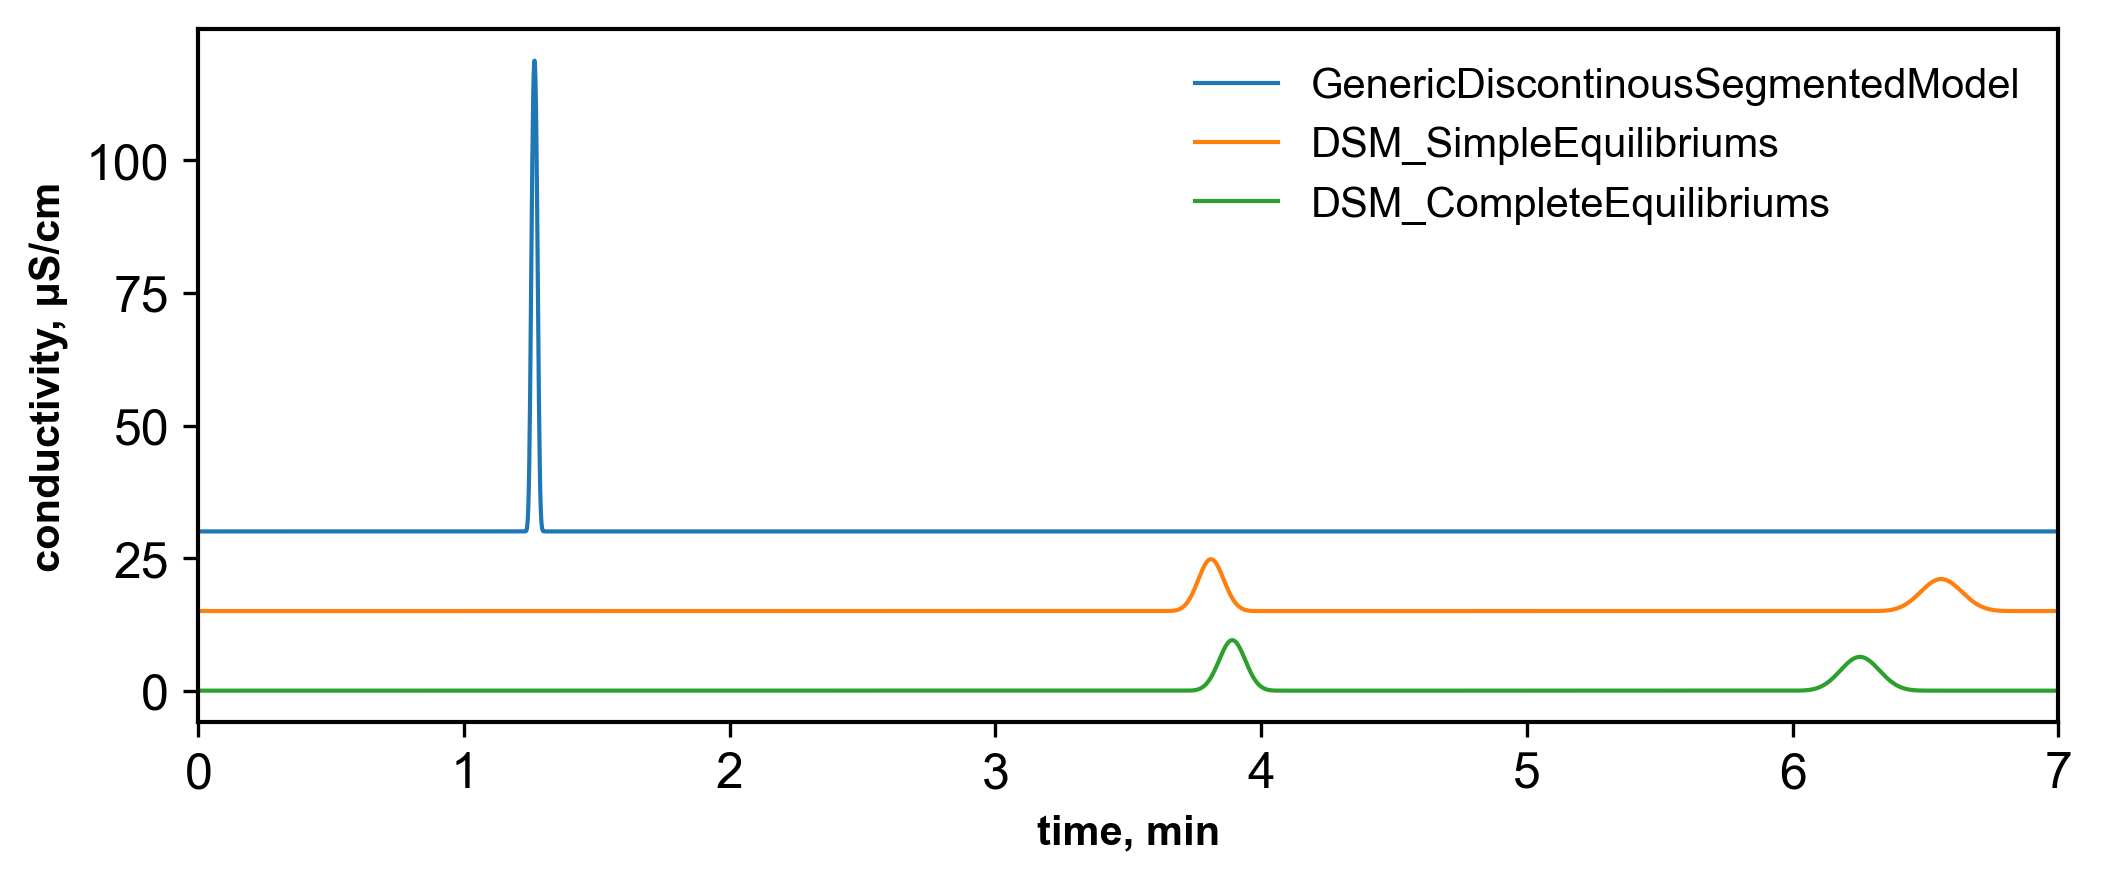

In [6]:
import matplotlib.pyplot as plt
from pyIClab.beadedbag import mpl_custom_rcconfig

plt.rcParams.update(mpl_custom_rcconfig)
fig, ax = plt.subplots()
offsets = [30, 15, 0]
labels = [
    GenericDiscontinousSegmentedModel.__name__,
    DSM_SimpleEquilibriums.__name__,
    DSM_CompleteEquilibriums.__name__,
    ]
for i, ic in enumerate([ic1, ic2, ic3]):
    xi, yi = x[i], y[i]
    yi += offsets[i]
    ax.plot(xi, yi,
        label=labels[i],   
        )
    
ax.legend()
ax.set_xlabel('time, min', fontsize=10, fontweight='bold')
ax.set_ylabel('conductivity, μS/cm', fontsize=10, fontweight='bold')    
ax.set(xlim=(0, 7))   


In [7]:
concentrated_solution = {'Cl-': '50 mM'}
for ic in [ic1, ic2, ic3]:
    (loop,) = tuple(ic.PEEKtubings)
    ic.inject(concentrated_solution, loop)
    ic.start('7.0 min')

15:43:19 Activating <IC System "IC-Demo">...
    15:43:19 Configurating model paratemers...
    15:43:19 Building models...
    15:43:20 Injecting Samples...
        0.0 min: Execute Command -- <Valve "SixPort"> INJECT


Processing Cl[-1] on <Loop "SampleLoop" 25 μL>:   0%|          | 0/70000 [00:00<?, ?it/s]

Processing Cl[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/70018 [00:00<?, ?it/s]

15:43:32 IC simulation finished...

15:43:32 Activating <IC System "IC-Demo">...
    15:43:32 Configurating model paratemers...
    15:43:32 Building models...
    15:43:32 Injecting Samples...
        0.0 min: Execute Command -- <Valve "SixPort"> INJECT


Processing Cl[-1] on <Loop "SampleLoop" 25 μL>:   0%|          | 0/70000 [00:00<?, ?it/s]

Processing Cl[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/23246 [00:00<?, ?it/s]

15:43:38 IC simulation finished...

15:43:38 Activating <IC System "IC-Demo">...
    15:43:38 Configurating model paratemers...
    15:43:38 Building models...
    15:43:39 Injecting Samples...
        0.0 min: Execute Command -- <Valve "SixPort"> INJECT


Processing Cl[-1] on <Loop "SampleLoop" 25 μL>:   0%|          | 0/70000 [00:00<?, ?it/s]

Processing Cl[-1] on <Column "Dummy" (4.6 × 150 mm)>:   0%|          | 0/23246 [00:00<?, ?it/s]

15:43:45 IC simulation finished...



In [8]:
x, y = [], []
for i, ic in enumerate([ic1, ic2, ic3]):
    (detector,) = tuple(ic.detectors)
    df = detector.get_signals(signal_type='conductivity')
    x.append(df['time'])
    y.append(df['signal'])

Calculating eluent conductivity on <Detector "detector">...:   0%|          | 0/4200 [00:00<?, ?it/s]

Calculating eluent conductivity on <Detector "detector">...:   0%|          | 0/4200 [00:00<?, ?it/s]

Calculating eluent conductivity on <Detector "detector">...:   0%|          | 0/4200 [00:00<?, ?it/s]

[(0.0, 6.0)]

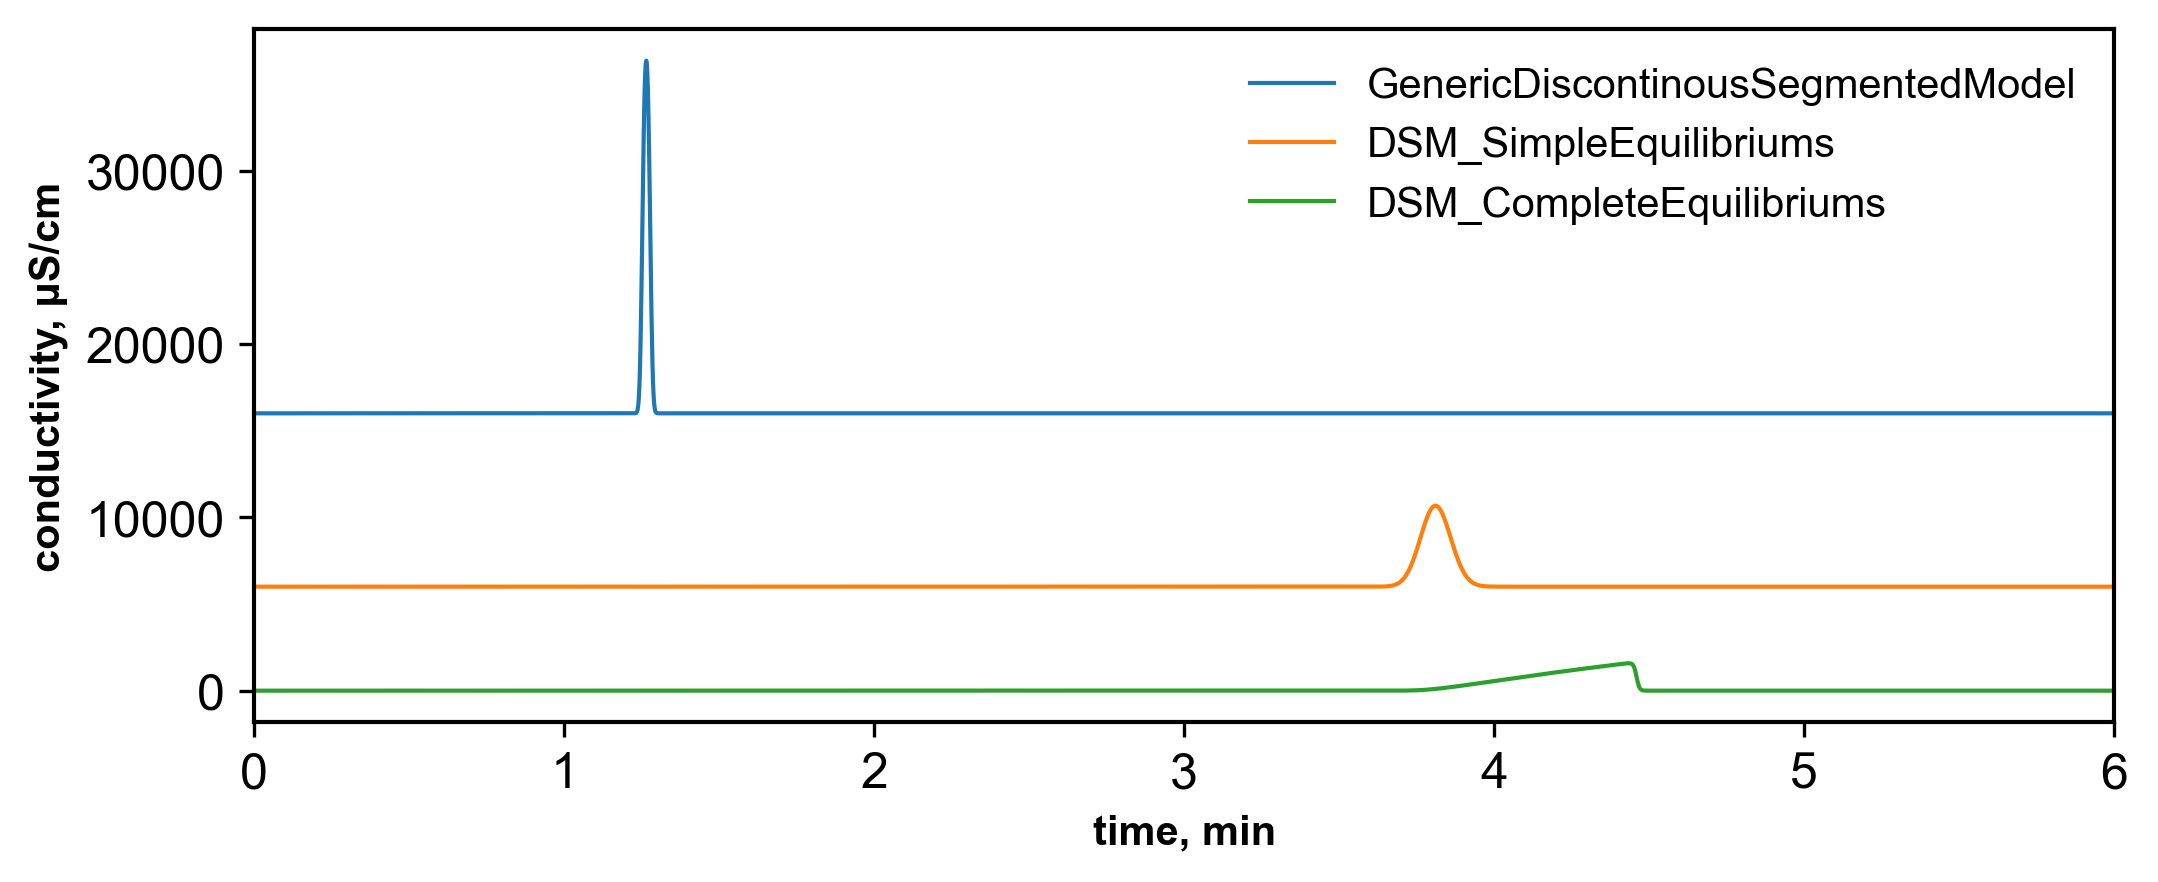

In [9]:
fig, ax = plt.subplots()
offsets = [16000, 6000, 0]
labels = [
    GenericDiscontinousSegmentedModel.__name__,
    DSM_SimpleEquilibriums.__name__,
    DSM_CompleteEquilibriums.__name__,
    ]
for i, ic in enumerate([ic1, ic2, ic3]):
    xi, yi = x[i], y[i]
    yi += offsets[i]
    ax.plot(xi, yi,
        label=labels[i],   
        )
    
ax.legend()
ax.set_xlabel('time, min', fontsize=10, fontweight='bold')
ax.set_ylabel('conductivity, μS/cm', fontsize=10, fontweight='bold')    
ax.set(xlim=(0, 6))  